In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
label=LabelEncoder()

import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


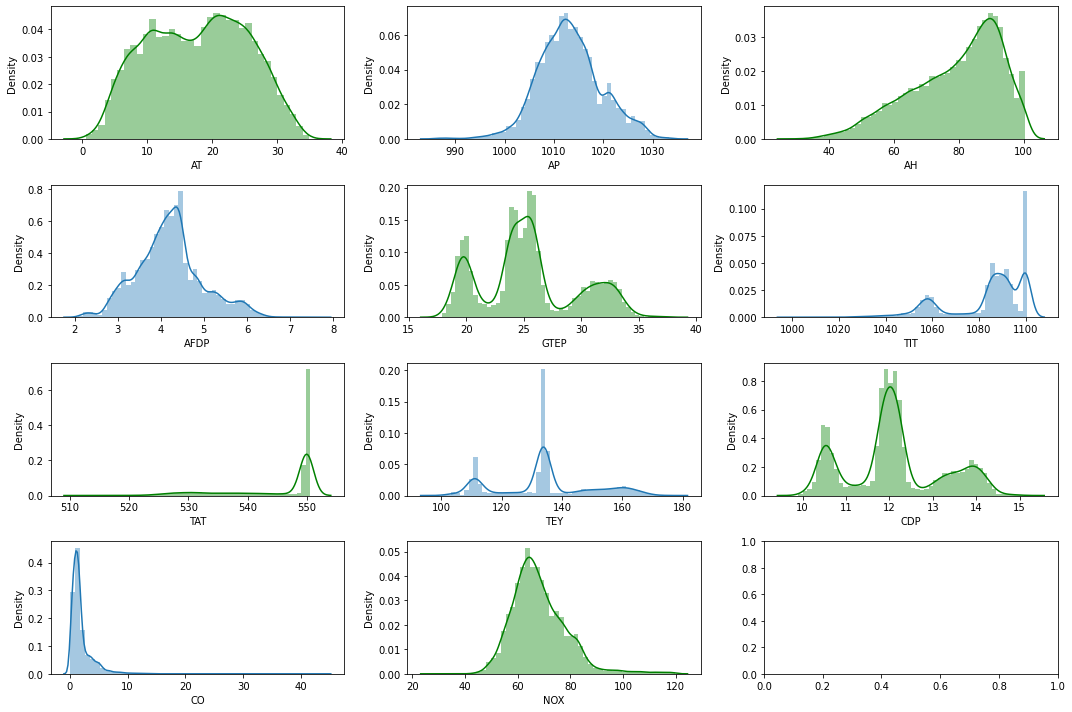

In [6]:
#Cheking the normal distribution of the data using distplot
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0],color='g')
sns.distplot(data.AP, ax=ax[0,1])
sns.distplot(data.AH, ax=ax[0,2],color='g')
sns.distplot(data.AFDP, ax=ax[1,0])
sns.distplot(data.GTEP, ax=ax[1,1],color='g')
sns.distplot(data.TIT, ax=ax[1,2])
sns.distplot(data.TAT, ax=ax[2,0],color='g')
sns.distplot(data.TEY, ax=ax[2,1])
sns.distplot(data.CDP, ax=ax[2,2],color='g')
sns.distplot(data.CO, ax=ax[3,0])
sns.distplot(data.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

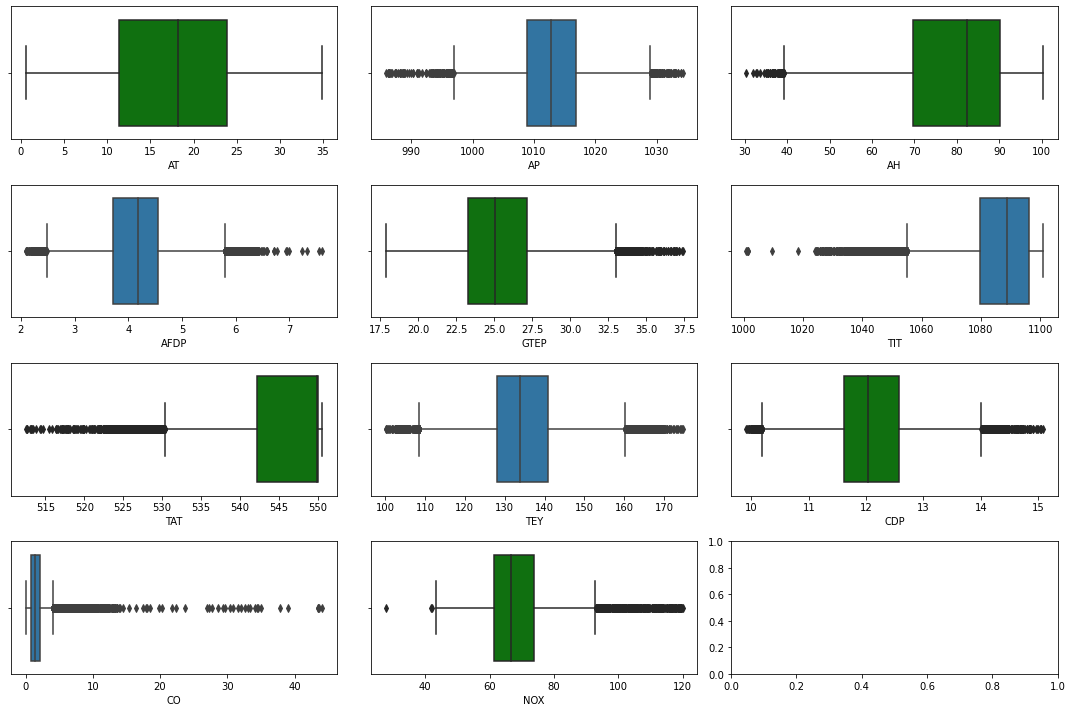

In [7]:
#Check for outliers in the dataset, using boxplot
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(data.AT, ax=ax[0,0],color='g')
sns.boxplot(data.AP, ax=ax[0,1])
sns.boxplot(data.AH, ax=ax[0,2],color='g')
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1],color='g')
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[2,0],color='g')
sns.boxplot(data.TEY, ax=ax[2,1])
sns.boxplot(data.CDP, ax=ax[2,2],color='g')
sns.boxplot(data.CO, ax=ax[3,0])
sns.boxplot(data.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

In [8]:
#Normalising the data using a mixmax scaler library
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [9]:
#Extracting the independent and dependent variables, from the dataset
X = data1.drop(axis=0,columns="TEY").values
Y = data1["TEY"].values

In [10]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [11]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [12]:
import numpy as np
seed = 7
np.random.seed(seed)

### Constructing a Sequential neural network with 12 neurons in the first input layer, 8 neurons in the hidden layer and 1 neuron in the output layer

In [13]:
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [14]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 2ms/step - loss: 0.0119 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 6.3191e-04 - accuracy: 9.9246e-05 - val_loss: 7.1741e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 4.7130e-04 - accuracy: 9.9246e-05 - val_loss: 4.8884e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 3.9066e-04 - accuracy: 9.9246e-05 - val_loss: 5.9295e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 3.3253e-04 - accuracy: 9.9246e-05 - val_loss: 3.6790e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 3.0590e-04 - accuracy: 9.9246e-05 - val_loss: 2.8457e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===================

1008/1008 [==============================] - 2s 2ms/step - loss: 2.6368e-04 - accuracy: 9.9246e-05 - val_loss: 2.5655e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6630e-04 - accuracy: 9.9246e-05 - val_loss: 3.1068e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6618e-04 - accuracy: 9.9246e-05 - val_loss: 3.2217e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6665e-04 - accuracy: 9.9246e-05 - val_loss: 2.3179e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6728e-04 - accuracy: 9.9246e-05 - val_loss: 2.3242e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6594e-04 - accuracy: 9.9246e-05 - val_loss: 2.6984e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [16]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 2.4474e-04 - accuracy: 1.3299e-04
accuracy: 0.01%


In [17]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6252e-04 - accuracy: 9.9246e-05 - val_loss: 2.3570e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6248e-04 - accuracy: 9.9246e-05 - val_loss: 2.2648e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6087e-04 - accuracy: 9.9246e-05 - val_loss: 2.3190e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6048e-04 - accuracy: 9.9246e-05 - val_loss: 2.4115e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6379e-04 - accuracy: 9.9246e-05 - val_loss: 2.2472e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6327e-04 - accuracy: 9.9246e-05 - val_loss: 2.7963e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===========

1008/1008 [==============================] - 2s 2ms/step - loss: 2.5893e-04 - accuracy: 9.9246e-05 - val_loss: 2.3873e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6589e-04 - accuracy: 9.9246e-05 - val_loss: 2.5604e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6003e-04 - accuracy: 9.9246e-05 - val_loss: 2.3226e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.5867e-04 - accuracy: 9.9246e-05 - val_loss: 2.3081e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6102e-04 - accuracy: 9.9246e-05 - val_loss: 2.2560e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.6156e-04 - accuracy: 9.9246e-05 - val_loss: 2.2843e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [18]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

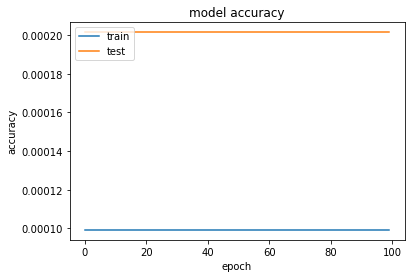

In [19]:
#Visualising the model history for train and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

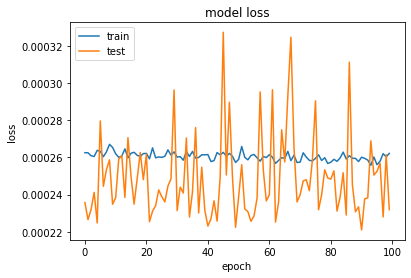

In [20]:
#Visualising the model history for the train and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()